# How to export arrays to tables, and then to latex format

### First example: a simple case

    - We use the astropy.constants package to ease our calculations
    - We build a table from lists and/or arrays
    - We export the table to a LaTeX table 
    - The "names" in latex may need the use of "raw strings" or \\ for special characters

In [10]:
# A simple case
#
fout='pretable1.tex'  #TeX table file with data used in plot
from pylab import *
from astropy.table import Table
from astropy import constants as cte

Mj=cte.M_jup.cgs.value      # Jovian mass (g)
Rj=cte.R_jup.cgs.value       # Jovian radius (cm)

# Define a dataset (could be read from another table)
nombre=['Jupiter','HD 189733 b','HD 209458 b','GJ 436 b']
masa=[1, 1.154, 0.685, 0.06739]  #Jovian units
radio=[1, 1.138, 1.39, 0.3739]

logden=np.array(log10(masa)+log10(Mj)-log10(4.*pi/3.)-\
                3.*(log10(radio)+log10(Rj)))
densidad=10**logden   # g/cm^3

# Prepare a TeX table:
out=Table(data=[nombre,masa,radio,densidad.round(2)],\
          names=(["Planet name","Mass ($M_{\\rm J}$)",\
                  'Radius ($R_{\\rm J}$)','$\\rho_{\\rm p}$']))
#out.sort(['Planet name'])
out.write(fout,format='latex',overwrite=True)
print(out)

Planet name Mass ($M_{\rm J}$) Radius ($R_{\rm J}$) $\rho_{\rm p}$
----------- ------------------ -------------------- --------------
    Jupiter                1.0                  1.0           1.24
HD 189733 b              1.154                1.138           0.97
HD 209458 b              0.685                 1.39           0.32
   GJ 436 b            0.06739               0.3739            1.6


In [6]:
out.show_in_notebook()

idx,Planet name,Mass ($M_{\rm J}$),Radius ($R_{\rm J}$),$\rho_{\rm p}$
0,Jupiter,1.0,1.0,1.24
1,HD 189733 b,1.154,1.138,0.97
2,HD 209458 b,0.685,1.39,0.32
3,GJ 436 b,0.06739,0.3739,1.6


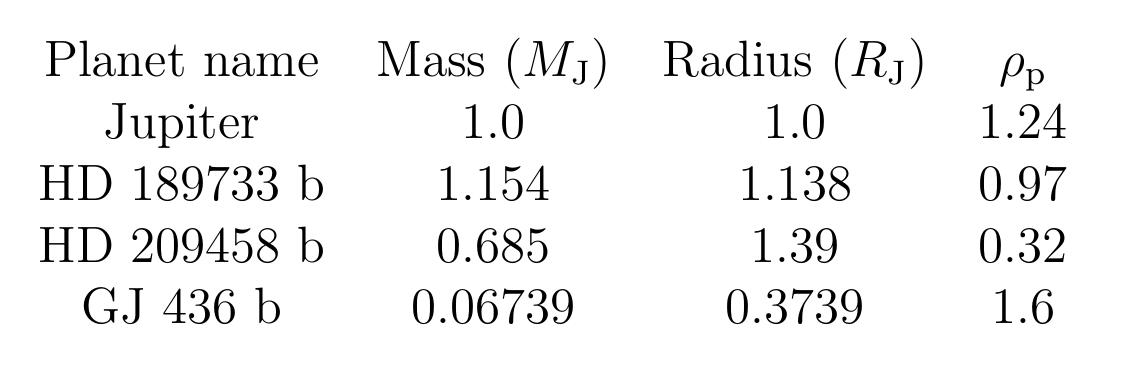

In [16]:
from IPython.display import Image
Image('files/2024_04_16_exporTeXtables_JorgeSanz/tabla1.png')

### Second example: Include error bars in our results

    - For the tables, the use of arrays is reccommended against lists
    - The axis of vectors is important: I use loops instead of var.append for the arrays with errors

In [11]:
# An example with (symmetric) errors
#
fout='pretable2.tex'  #TeX table file with data used in plot
from pylab import *
from astropy.table import Table
from astropy import constants as cte

Mj=cte.M_jup.cgs.value      # Jovian mass (g)
Rj=cte.R_jup.cgs.value       # Jovian radius (cm)

# Define a dataset
nombre=['Jupiter','HD 189733 b','HD 209458 b','GJ 436 b']
masa=np.array([1, 1.154, 0.685, 0.06739])  #Jovian units
em=np.array([0.001, 0.025, 0.017, 0.0006])
radio=np.array([1, 1.138, 1.39, 0.3739])
er=np.array([0.001, 0.077, 0.018, 0.0097])

logden=log10(masa)+log10(Mj)-log10(4.*pi/3.)-\
                3.*(log10(radio)+log10(Rj))
densidad=10**logden   # g/cm^3
erho=densidad*sqrt((em/masa)**2+(er/radio)**2)

# Format columns of the table:
n=len(masa)
mass=zeros(n,'U20'); radius=zeros(n,'U20'); density=zeros(n,'U20')
for i in range(len(masa)):
    mass[i]=str(masa[i])+'$\pm$'+str(em[i])
    radius[i]=str(radio[i])+'$\pm$'+str(er[i])
    density[i]=str(densidad[i].round(2))+'$\pm$'+str(erho[i].round(2))
                                       
# Prepare a TeX table vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
out=Table(data=[nombre,mass,radius,density],\
          names=(["Planet name",r'Mass ($M_{\rm J}$)',\
                  r'Radius ($R_{\rm J}$)',r'$\rho_{\rm p}$']))
out.write(fout,format='latex',overwrite=True)
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print(out)

Planet name Mass ($M_{\rm J}$) Radius ($R_{\rm J}$) $\rho_{\rm p}$
----------- ------------------ -------------------- --------------
    Jupiter      1.0$\pm$0.001        1.0$\pm$0.001   1.24$\pm$0.0
HD 189733 b    1.154$\pm$0.025      1.138$\pm$0.077  0.97$\pm$0.07
HD 209458 b    0.685$\pm$0.017       1.39$\pm$0.018  0.32$\pm$0.01
   GJ 436 b 0.06739$\pm$0.0006    0.3739$\pm$0.0097   1.6$\pm$0.04


In [8]:
out.show_in_notebook()

idx,Planet name,Mass ($M_{\rm J}$),Radius ($R_{\rm J}$),$\rho_{\rm p}$
0,Jupiter,1.0$\pm$0.001,1.0$\pm$0.001,1.24$\pm$0.0
1,HD 189733 b,1.154$\pm$0.025,1.138$\pm$0.077,0.97$\pm$0.07
2,HD 209458 b,0.685$\pm$0.017,1.39$\pm$0.018,0.32$\pm$0.01
3,GJ 436 b,0.06739$\pm$0.0006,0.3739$\pm$0.0097,1.6$\pm$0.04


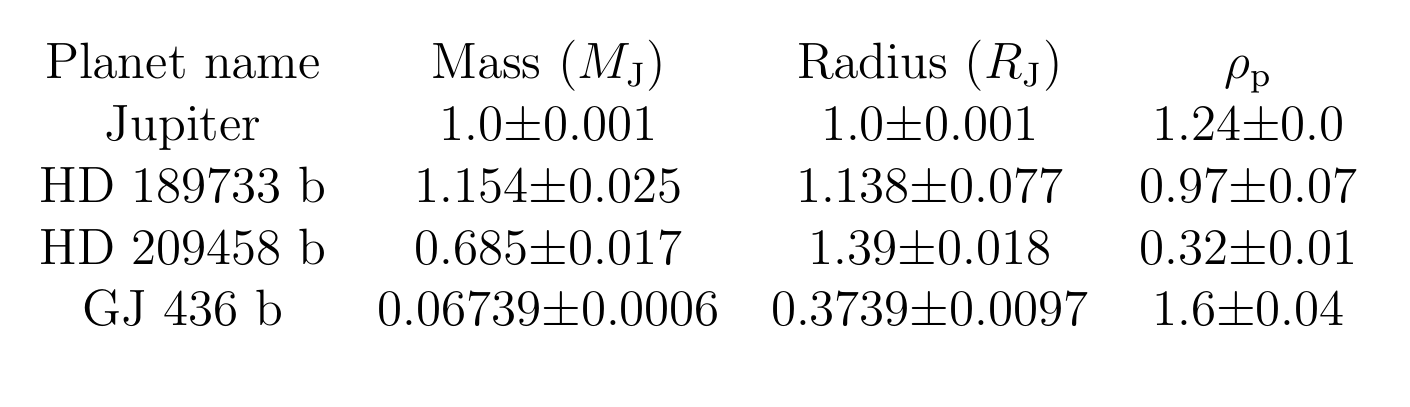

In [14]:
from IPython.display import Image
Image('files/2024_04_16_exporTeXtables_JorgeSanz/tabla2.png',width=950,height=250)

### Third example: include assymmetric errors

    - The definition of each value takes longer, but that's all
    - I include here the units in the table with their own row
    - 'latexdict' allows for some additions to the table, like caption or columns alignment

In [9]:
# An example with upper and lower limits
#
fout='pretable3.tex'  #TeX table file with data used in plot
from pylab import *
from astropy.table import Table
from astropy import constants as cte

Mj=cte.M_jup.cgs.value      # Jovian mass (g)
Rj=cte.R_jup.cgs.value       # Jovian radius (cm)

# Define a dataset
nombre=['Jupiter','HD 189733 b','HD 209458 b','GJ 436 b']
masa=np.array([1, 1.154, 0.685, 0.06739])  #Jovian units
em=np.array([0.001, 0.025, 0.017, 0.0006])
radio=np.array([1, 1.138, 1.39, 0.3739])
rlow=np.array([0.9985,1.059,1.360,0.3635])
rup=np.array([1.001,1.210,1.404,0.3820])
er=0.5*(rup-rlow)   #This is an approximation just for this demo

logden=log10(masa)+log10(Mj)-log10(4.*pi/3.)-\
                3.*(log10(radio)+log10(Rj))
densidad=10**logden   # g/cm^3
erho=densidad*sqrt((em/masa)**2+(er/radio)**2)

# Format columns of the table:
n=len(masa)
mass=zeros(n,'U24'); radius=zeros(n,'U28'); density=zeros(n,'U24')
low=radio-rlow
up=rup-radio
for i in range(len(masa)):
    mass[i]=str(masa[i])+'$\pm$'+str(em[i])
    density[i]=str(densidad[i].round(2))+'$\pm$'+str(erho[i].round(2))
    radius[i]=str(radio[i])+'$^{+'+str(up[i].round(3))+\
        '}_{-'+str(low[i].round(3))+'}$'
    #Alternatively:
    radius[i]=str(radio[i])+'$^{+'+format(up[i],'5.3f')+\
        '}_{-'+format(low[i],'5.3f')+'}$'
                                       
# Prepare a TeX table vvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvvv
out=Table(data=[nombre,mass,radius,density],\
          names=(["Planet name","Mass",\
                  'Radius',r'$\rho_{\rm p}$']))
out.write(fout,format='latex',overwrite=True,\
          latexdict={'units': {'Mass': '$M_{\\rm J}$', \
                               'Radius': '$R_{\\rm J}$', \
                               r'$\rho_{\rm p}$': 'g cm$^{-3}$'}})
#^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
print(out)

Planet name        Mass                  Radius           $\rho_{\rm p}$
----------- ------------------ -------------------------- --------------
    Jupiter      1.0$\pm$0.001    1.0$^{+0.001}_{-0.001}$   1.24$\pm$0.0
HD 189733 b    1.154$\pm$0.025  1.138$^{+0.072}_{-0.079}$  0.97$\pm$0.07
HD 209458 b    0.685$\pm$0.017   1.39$^{+0.014}_{-0.030}$  0.32$\pm$0.01
   GJ 436 b 0.06739$\pm$0.0006 0.3739$^{+0.008}_{-0.010}$   1.6$\pm$0.04


In [4]:
out.show_in_notebook()

idx,Planet name,Mass,Radius,$\rho_{\rm p}$
0,Jupiter,1.0$\pm$0.001,1.0$^{+0.001}_{-0.001}$,1.24$\pm$0.0
1,HD 189733 b,1.154$\pm$0.025,1.138$^{+0.072}_{-0.079}$,0.97$\pm$0.07
2,HD 209458 b,0.685$\pm$0.017,1.39$^{+0.014}_{-0.030}$,0.32$\pm$0.01
3,GJ 436 b,0.06739$\pm$0.0006,0.3739$^{+0.008}_{-0.010}$,1.6$\pm$0.04


The UNITS of the table show up **only** in the latex file 

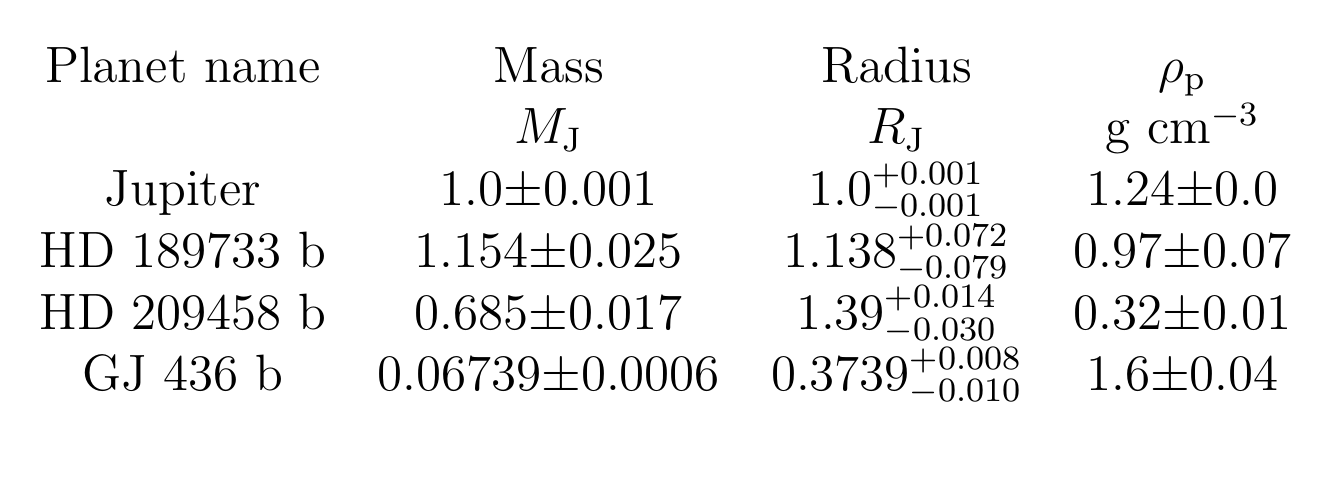

In [17]:
from IPython.display import Image
Image('files/2024_04_16_exporTeXtables_JorgeSanz/tabla3.png')

    - It is possible to include more things in the LaTeX table, but it use to be better to change it by hand afterwards
    - There are some alternatives, like using 'aastex' instead of 'latex' in the table format (for ApJ); or using  A&A settings in the latexdict (it did not work for me)
    - hline and commands like that need to be added afterwards

More info: https://docs.astropy.org/en/stable/io/unified.html#
